In [38]:
# pulling from Oracle transaction database at work -- I ran it once, you should read 2 cells down to pull from local drive
import cx_Oracle
import pandas as pd
import yaml
import os 

cred = yaml.load(open(os.path.expanduser('prod_cred.yml')))
conn = cx_Oracle.connect(cred['USER'] + '/' + cred['PW'] + '@PROD')
base = pd.io.sql.read_sql(
    """
    select full_address, assessed_land_value, assessed_total_value, assessed_imp_value, 
        zip, 
        full_bathroom_count + partial_bathroom_count * 0.5 bath,
        bedroom_count as bed,
        2009 - year_built as age,
        stories,
        garage_type,
        parking,
        total_units,
        pool,
        fireplace,
        property_type,
        building_area,
        lot_size,
        fidelity_latitude,
        fidelity_longitude
        
        from bdr.fidelity_assessment_record f
        JOIN bdr.zipcode_city_mapping zcm ON f.zip = zcm.zipcode
        WHERE zcm.mls_table = 'MLS_CA_BA'
        and assessment_year = 2009
        and lot_size > 0
    ORDER BY address_id
    """, conn)

base = base.drop('FULL_ADDRESS', axis = 1)

base.to_csv(path_or_buf = 'base.csv')
lookup.to_csv('lookup.csv')

In [39]:
base.to_csv(path_or_buf = 'base.csv')
lookup.to_csv('lookup.csv')

In [40]:
from sklearn.cross_validation import train_test_split

base_l, base_s = train_test_split(base, test_size = 1000, random_state = 32)
base_s = pd.DataFrame(base_s, columns = base.columns)
base_s.to_csv('base_s.csv')

In [41]:
try:
    lookup = pd.read_csv('lookup.csv', header=None, names=['full_address'])
    print lookup.head()
except:
    print 'You have no access to the lookup file, which is used for troubleshooting during the exploratory phase only.'

     full_address
NaN  full_address
 0    1529 3RD ST
 1    1525 3RD ST
 2    1523 3RD ST
 3    1519 3RD ST


#READ THIS
The full data (base.csv) is too big for GitHub, so I sample 1000 random rows into base_s.csv (using train_test_split) with the step above. If using the full data (not on GitHub), run everything below; if using the sample data, adjust the cell below to read from base_s.csv instead of base.csv.

For most applications, do not run the 2 cells above this one.

I also create and import an address lookup file to help with my exploration. This is not provided on GitHub.

In [83]:
import pandas as pd
from seaborn import plt
import seaborn as sns
%matplotlib inline

base = pd.read_csv('base.csv')
print len(base)
base = base.drop('Unnamed: 0', axis = 1)
base.head().T.to_csv('data_example.csv')
base.head()

1558278


,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
0,15464,46393,61857,94607,1.0,2,119,2,G,0,0,NaN,NaN,NaN,572,2500,37.803152,-122.296821
1,90000,210000,300000,94607,0.5,2,119,2,G,0,0,NaN,NaN,NaN,572,2500,37.803141,-122.296767
2,17487,125805,143292,94607,2.0,4,119,2,NaN,0,0,NaN,NaN,NaN,1672,2500,37.803136,-122.296740
3,27290,56096,83386,94607,1.5,4,119,2,NaN,0,0,NaN,NaN,NaN,1144,2500,37.803125,-122.296685
4,18193,37903,56096,94607,2.0,4,129,2,G,0,1,NaN,NaN,NaN,1594,2500,37.803093,-122.296523


In [84]:
base.describe().T

,count,mean,std,min,25%,50%,75%,max
ASSESSED_LAND_VALUE,1558278,173641.223270,306787.064111,0.000000,46616.000000,101761.000000,206400.000000,1.134974e+08
ASSESSED_TOTAL_VALUE,1558278,204622.388653,239538.804009,0.000000,83766.000000,160509.000000,261788.500000,7.808417e+07
ASSESSED_IMP_VALUE,1558278,378263.611922,471608.242032,0.000000,144973.250000,281639.000000,478592.750000,1.134974e+08
ZIP,1558278,94742.482704,392.571872,93109.000000,94534.000000,94597.000000,95051.000000,9.600100e+04
BATH,1558278,1.985419,0.946865,0.000000,1.000000,2.000000,2.500000,2.000000e+01
BED,1558278,2.880011,1.392383,0.000000,2.000000,3.000000,4.000000,2.000000e+01
AGE,1466427,44.196920,24.995731,0.000000,25.000000,43.000000,58.000000,1.990000e+02
PARKING,1558278,1.272550,11.772471,0.000000,0.000000,1.000000,2.000000,2.700000e+03
TOTAL_UNITS,1558278,0.215387,0.933769,0.000000,0.000000,0.000000,0.000000,3.000000e+02
BUILDING_AREA,1558278,1773.018450,4366.809136,0.000000,1185.000000,1560.000000,2094.000000,3.074000e+05


## Zero-handling

In [85]:
# how bad are the zeros?

for i in base.columns:
    print i + ': ' + str((base[i] == 0).sum())

ASSESSED_LAND_VALUE: 1694
ASSESSED_TOTAL_VALUE: 41902
ASSESSED_IMP_VALUE: 1669
ZIP: 0
BATH: 98502
BED: 180468
AGE: 486
STORIES: 0
GARAGE_TYPE: 0
PARKING: 650849
TOTAL_UNITS: 1314170
POOL: 0
FIREPLACE: 0
PROPERTY_TYPE: 0
BUILDING_AREA: 73916
LOT_SIZE: 0
FIDELITY_LATITUDE: 9081
FIDELITY_LONGITUDE: 9081


In [86]:
base = base[base.ASSESSED_TOTAL_VALUE > 0] # remove Land
base = base[base.FIDELITY_LATITUDE > 0] # remove properties with no lat/long information
base = base[base.ASSESSED_LAND_VALUE > 0] # remove properties with no land value
base = base[base.BUILDING_AREA > 0] # remove properties with no land value

for i in base.columns:
    print i + ': ' + str((base[i] == 0).sum())

ASSESSED_LAND_VALUE: 0
ASSESSED_TOTAL_VALUE: 0
ASSESSED_IMP_VALUE: 0
ZIP: 0
BATH: 30309
BED: 112002
AGE: 430
STORIES: 0
GARAGE_TYPE: 0
PARKING: 576226
TOTAL_UNITS: 1253660
POOL: 0
FIREPLACE: 0
PROPERTY_TYPE: 0
BUILDING_AREA: 0
LOT_SIZE: 0
FIDELITY_LATITUDE: 0
FIDELITY_LONGITUDE: 0


Large # of properties with no bath, no bed, have to check if it's right or if it's studio.

In [87]:
print zip(lookup.iloc[9], lookup.iloc[19], lookup.iloc[20], lookup.iloc[21], lookup.iloc[22]), lookup.iloc[1558181]
base[base.BED == 0].head()

[('732 4TH ST', '424 2ND ST', '373 4TH ST', '373 4TH ST', '373 4TH ST')] full_address    1309 65TH ST
Name: 1558180.0, dtype: object


,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
9,9139,11251,20390,94607,0,0,119,NaN,NaN,0,0,NaN,NaN,NaN,736,1875,37.800795,-122.281557
19,139200,324800,464000,94607,1,0,100,3,NaN,0,0,NaN,NaN,NaN,1700,8234,37.797090,-122.273072
20,106200,247800,354000,94607,1,0,100,3,NaN,0,0,NaN,NaN,NaN,1500,8234,37.797090,-122.273072
21,24798,235588,260386,94607,1,0,100,3,NaN,0,0,NaN,NaN,NaN,1700,8234,37.797090,-122.273072
22,156000,364000,520000,94607,1,0,100,3,NaN,0,0,NaN,NaN,NaN,1850,8234,37.797090,-122.273072


In [88]:
base[base.BATH == 0].head()

,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
9,9139,11251,20390,94607,0,0,119,NaN,NaN,0,0,NaN,NaN,NaN,736,1875.00,37.800795,-122.281557
29,87900,205100,293000,94607,0,0,10,1,NaN,0,0,NaN,NaN,NaN,1072,1.03,37.796396,-122.271534
30,115500,269500,385000,94607,0,0,10,1,NaN,0,0,NaN,NaN,NaN,1157,1.03,37.795007,-122.267178
31,105900,247100,353000,94607,0,0,10,1,NaN,0,0,NaN,NaN,NaN,1061,1.03,37.796396,-122.271534
32,123000,287000,410000,94607,0,0,10,1,NaN,0,0,NaN,NaN,NaN,1115,1.03,37.796396,-122.271534


Looking up a few cases reveals that 0 bed/bath tends to be error data, with no immediate pattern (e.g. small, big homes and condos all have this problem). Going to drop them all and not worry about them.

In [89]:
base = base[base.BED > 0]
base = base[base.BATH > 0]

for i in base.columns:
    print i + ': ' + str((base[i] == 0).sum())

ASSESSED_LAND_VALUE: 0
ASSESSED_TOTAL_VALUE: 0
ASSESSED_IMP_VALUE: 0
ZIP: 0
BATH: 0
BED: 0
AGE: 403
STORIES: 0
GARAGE_TYPE: 0
PARKING: 478890
TOTAL_UNITS: 1163043
POOL: 0
FIREPLACE: 0
PROPERTY_TYPE: 0
BUILDING_AREA: 0
LOT_SIZE: 0
FIDELITY_LATITUDE: 0
FIDELITY_LONGITUDE: 0


## Error-handling

In [90]:
len(base) - base.count() # how many errors?

ASSESSED_LAND_VALUE           0
ASSESSED_TOTAL_VALUE          0
ASSESSED_IMP_VALUE            0
ZIP                           0
BATH                          0
BED                           0
AGE                        8547
STORIES                  415995
GARAGE_TYPE              235944
PARKING                       0
TOTAL_UNITS                   0
POOL                    1237109
FIREPLACE               1158446
PROPERTY_TYPE           1301451
BUILDING_AREA                 0
LOT_SIZE                      0
FIDELITY_LATITUDE             0
FIDELITY_LONGITUDE            0
dtype: int64

In [91]:
base.PROPERTY_TYPE.value_counts()

SFR    38094
PUD    11337
CND     8679
MFD     5026
RES     1572
2ND      813
MFG       17
COM        1
AGR        1
dtype: int64

PROPERTY_TYPE does not look useful, the missing data appears to be non-trivial

With AGE, I'll assume missing data = 0 or avg or see/look up how the algorithm handles it.<br>
With STORIES, I'll assume missing data = 1<br>
With GARAGE_TYPE, POOL and FIERPLACE, I'll assume missing data = None (or Unknown if None turns out to be common)

In [92]:
# creating advanced metrics, then defining which I'll use to model
base['landval_perc'] = base.ASSESSED_LAND_VALUE / base.ASSESSED_IMP_VALUE
base['lot_perc'] = 1 - base.BUILDING_AREA / base.LOT_SIZE
base.lot_perc = base.lot_perc.apply(lambda x: x == 0 if x < -1 else x)

metrics = ['ASSESSED_IMP_VALUE',
           'landval_perc',
           'BED',
           'BATH',
           'AGE',
           'STORIES',
           'GARAGE_TYPE',
           'PARKING',
           'TOTAL_UNITS',
           'POOL',
           'FIREPLACE',
           'BUILDING_AREA',
           'lot_perc']

X = base[metrics]
base[metrics].head()

,ASSESSED_IMP_VALUE,landval_perc,BED,BATH,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,BUILDING_AREA,lot_perc
0,61857,0.249996,2,1.0,119,2,G,0,0,NaN,NaN,572,0.7712
1,300000,0.300000,2,0.5,119,2,G,0,0,NaN,NaN,572,0.7712
2,143292,0.122038,4,2.0,119,2,NaN,0,0,NaN,NaN,1672,0.3312
3,83386,0.327273,4,1.5,119,2,NaN,0,0,NaN,NaN,1144,0.5424
4,56096,0.324319,4,2.0,129,2,G,0,1,NaN,NaN,1594,0.3624


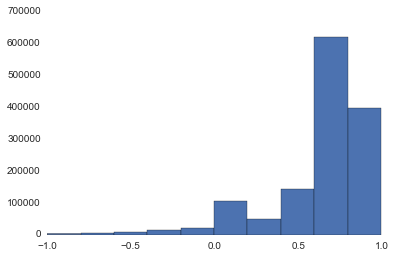

In [97]:
base.lot_perc.hist()

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

pca_pipe = Pipeline( 
                    )

TypeError: __init__() takes exactly 2 arguments (1 given)

#Caveats about Data
 - I can't distinguish between SFR, MFR, CONDO, TOWNHOUSE etc because property_type is badly populated. I do have this internally, and can even use a classification problem to label my data, but going to roll with it. This means BUILDING_AREA and LOT_SIZE metrics might be off.